# Getting data and making it ready for analysis

In [24]:
import pandas as pd

In [25]:
df=pd.read_csv('pdata.csv')#https://data.cityofnewyork.us/Health/DOHMH-New-York-City-Restaurant-Inspection-Results/43nn-pn8j

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
grade_sub=df.dropna(subset=['GRADE'])

In [28]:
import warnings
warnings.simplefilter(action='ignore')

In [29]:
grade_sub['GRADE']=grade_sub['GRADE'].replace('A', '7')
grade_sub['GRADE']=grade_sub['GRADE'].replace('B', '6')
grade_sub['GRADE']=grade_sub['GRADE'].replace('C', '5')
grade_sub['GRADE']=grade_sub['GRADE'].replace('Z', '4')
grade_sub['GRADE']=grade_sub['GRADE'].replace('P', '3')
grade_sub['GRADE']=grade_sub['GRADE'].replace('N', '2')
grade_sub['GRADE']=grade_sub['GRADE'].replace('G', '1')
grade_sub['GRADE']=grade_sub['GRADE'].astype(int)

# General information on data

In [30]:
popular_cuisine=df.groupby('CUISINE DESCRIPTION')['CUISINE DESCRIPTION'].agg(['count'])

In [31]:
popular_cuisine.sort_values(by=['count'],ascending=False).head(5)

,count
CUISINE DESCRIPTION,
American,83240
Chinese,42002
Café/Coffee/Tea,19192
Pizza,17449
"Latin (Cuban, Dominican, Puerto Rican, South & Central American)",17252


In [32]:
grade_sub.groupby('CUISINE DESCRIPTION')['GRADE'].agg(['mean','count','std']).sort_values('mean',ascending=False).head(5)

,mean,count,std
CUISINE DESCRIPTION,,,
Czech,7.0,28,0.0
Basque,7.0,4,0.0
Nuts/Confectionary,7.0,24,0.0
Scandinavian,7.0,41,0.0
Soups,7.0,32,0.0


In [33]:
grade_sub.groupby('BORO')['GRADE'].agg(['mean','count','std']).sort_values('mean',ascending=False)

,mean,count,std
BORO,,,
Staten Island,6.683814,6765,0.796269
Manhattan,6.635894,78219,0.862866
Queens,6.614701,46229,0.913507
Brooklyn,6.610028,50437,0.904697
Bronx,6.585610,18596,0.880145
0,6.562500,48,0.711793


In [34]:
inspection_grades=df.groupby('GRADE')['GRADE'].agg(['count'])

In [35]:
inspection_grades.sort_values(by=['count'],ascending=False)

,count
GRADE,
A,157248
B,24932
C,9289
Z,4571
P,2671
N,1578
G,5


In [36]:
df['GRADE'].isna().sum()

196071

In [37]:
df['GRADE'].count()

200294

In [38]:
violation=df.groupby('VIOLATION DESCRIPTION')['VIOLATION DESCRIPTION'].agg(['count']).sort_values(by=['count'],ascending=False)
violation.head(5)

,count
VIOLATION DESCRIPTION,
"Non-food contact surface improperly constructed. Unacceptable material used. Non-food contact surface or equipment improperly maintained and/or not properly sealed, raised, spaced or movable to allow accessibility for cleaning on all sides, above and underneath the unit.",55840
Facility not vermin proof. Harborage or conditions conducive to attracting vermin to the premises and/or allowing vermin to exist.,44003
Evidence of mice or live mice present in facility's food and/or non-food areas.,29131
"Food contact surface not properly washed, rinsed and sanitized after each use and following any activity when contamination may have occurred.",27134
"Food not protected from potential source of contamination during storage, preparation, transportation, display or service.",24490


In [39]:
vd=df['VIOLATION DESCRIPTION'].dropna()
vd.head(5)

0    Evidence of mice or live mice present in facil...
1    Cold food item held above 41º F (smoked fish a...
2    Facility not vermin proof. Harborage or condit...
3    Raw, cooked or prepared food is adulterated, c...
4    Plumbing not properly installed or maintained;...
Name: VIOLATION DESCRIPTION, dtype: object

In [40]:
violation_t = []
for i in vd:
    for k in i.split("."):
        if k:
            violation_t.append(k)

In [41]:
violation_df=pd.DataFrame(violation_t, columns=['Violation Comment'])
violation_df.head(5)

,Violation Comment
0,Evidence of mice or live mice present in facil...
1,Cold food item held above 41º F (smoked fish a...
2,Facility not vermin proof
3,Harborage or conditions conducive to attracti...
4,"Raw, cooked or prepared food is adulterated, c..."


In [42]:
violation_df.groupby('Violation Comment')['Violation Comment'].agg(['count']).sort_values(by=['count'],ascending=False).head(5)

,count
Violation Comment,
Unacceptable material used,56380
"Non-food contact surface or equipment improperly maintained and/or not properly sealed, raised, spaced or movable to allow accessibility for cleaning on all sides, above and underneath the unit",55840
Non-food contact surface improperly constructed,55840
Facility not vermin proof,44003
Harborage or conditions conducive to attracting vermin to the premises and/or allowing vermin to exist,44003


In [43]:
df.groupby('BORO')['BORO'].agg(['count']).sort_values(by=['count'],ascending=False)

,count
BORO,
Manhattan,155742
Brooklyn,100828
Queens,90641
Bronx,35898
Staten Island,13144
0,112


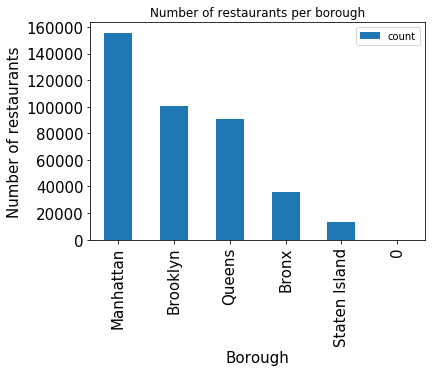

In [132]:
ax = bp[['count']].plot(kind='bar', title ="Number of restaurants per borough",  legend=True, fontsize=15)
ax.set_xlabel("Borough", fontsize=15)
ax.set_ylabel("Number of restaurants", fontsize=15)
plt.show()

# Analysis of Manhattan

In [45]:
manhattan_df=df.loc[df['BORO']=='Manhattan']

In [46]:
a=manhattan_df.groupby('CUISINE DESCRIPTION')['CUISINE DESCRIPTION'].agg(['count']).sort_values(by=['count'],ascending=False)
a=a.rename(columns={'count':'Manhattan'})
a.head(5)

,Manhattan
CUISINE DESCRIPTION,
American,43039
Chinese,10778
Café/Coffee/Tea,10186
Italian,9525
Japanese,7799


In [47]:
grade_a=manhattan_df.groupby('GRADE')['GRADE'].agg(['count']).sort_values(by=['count'],ascending=False)
grade_a=grade_a.rename(columns={'count':'Manhattan'})
grade_a

,Manhattan
GRADE,
A,62003
B,9229
C,3707
Z,1805
P,956
N,516
G,3


In [48]:
manhattan_df['GRADE'].isna().sum()

77523

In [49]:
vd_m=manhattan_df['VIOLATION DESCRIPTION'].dropna()

In [50]:
violation_m = []
for i in vd_m:
    for k in i.split("."):
        if k:
            violation_m.append(k)

In [51]:
violation_manhattan=pd.DataFrame(violation_m, columns=['Violation Comment'])

In [52]:
va=violation_manhattan.groupby('Violation Comment')['Violation Comment'].agg(['count']).sort_values(by=['count'],ascending=False)
va=va.rename(columns={'count':'Manhattan'})
va.head(5)

,Manhattan
Violation Comment,
Unacceptable material used,22014
Non-food contact surface improperly constructed,21840
"Non-food contact surface or equipment improperly maintained and/or not properly sealed, raised, spaced or movable to allow accessibility for cleaning on all sides, above and underneath the unit",21840
Harborage or conditions conducive to attracting vermin to the premises and/or allowing vermin to exist,17021
Facility not vermin proof,17021


# Analysis of Brooklyn

In [53]:
brooklyn_df=df.loc[df['BORO']=='Brooklyn']

In [54]:
b=brooklyn_df.groupby('CUISINE DESCRIPTION')['CUISINE DESCRIPTION'].agg(['count']).sort_values(by=['count'],ascending=False)
b.head(5)

,count
CUISINE DESCRIPTION,
American,18277
Chinese,12627
Caribbean,7133
Café/Coffee/Tea,5334
Mexican,4909


In [55]:
grade_b=brooklyn_df.groupby('GRADE')['GRADE'].agg(['count']).sort_values(by=['count'],ascending=False)
grade_b

,count
GRADE,
A,39302
B,6577
C,2266
Z,1053
P,796
N,441
G,2


In [56]:
brooklyn_df['GRADE'].isna().sum()

50391

In [57]:
vd_b=brooklyn_df['VIOLATION DESCRIPTION'].dropna()

In [58]:
violation_b = []
for i in vd_b:
    for k in i.split("."):
        if k:
            violation_b.append(k)

In [59]:
violation_brooklyn=pd.DataFrame(violation_b, columns=['Violation Comment'])

In [60]:
vb=violation_brooklyn.groupby('Violation Comment')['Violation Comment'].agg(['count']).sort_values(by=['count'],ascending=False)
vb.head(5)

,count
Violation Comment,
Unacceptable material used,14474
Non-food contact surface improperly constructed,14278
"Non-food contact surface or equipment improperly maintained and/or not properly sealed, raised, spaced or movable to allow accessibility for cleaning on all sides, above and underneath the unit",14278
Harborage or conditions conducive to attracting vermin to the premises and/or allowing vermin to exist,11373
Facility not vermin proof,11373


# Analysis of Queens

In [61]:
queens_df=df.loc[df['BORO']=='Queens']

In [62]:
c=queens_df.groupby('CUISINE DESCRIPTION')['CUISINE DESCRIPTION'].agg(['count']).sort_values(by=['count'],ascending=False)

In [63]:
grade_c=queens_df.groupby('GRADE')['GRADE'].agg(['count']).sort_values(by=['count'],ascending=False)
grade_c

,count
GRADE,
A,36423
B,5553
C,2079
Z,1071
P,627
N,476


In [64]:
queens_df['GRADE'].isna().sum()

44412

In [65]:
vd_q=queens_df['VIOLATION DESCRIPTION'].dropna()

In [66]:
violation_q = []
for i in vd_q:
    for k in i.split("."):
        if k:
            violation_q.append(k)

In [67]:
violation_queens=pd.DataFrame(violation_q, columns=['Violation Comment'])

In [68]:
vc=violation_queens.groupby('Violation Comment')['Violation Comment'].agg(['count']).sort_values(by=['count'],ascending=False)
vc.head(5)

,count
Violation Comment,
Unacceptable material used,12986
Non-food contact surface improperly constructed,12861
"Non-food contact surface or equipment improperly maintained and/or not properly sealed, raised, spaced or movable to allow accessibility for cleaning on all sides, above and underneath the unit",12861
Harborage or conditions conducive to attracting vermin to the premises and/or allowing vermin to exist,9674
Facility not vermin proof,9674


# Analysis of Bronx

In [69]:
bronx_df=df.loc[df['BORO']=='Bronx']

In [70]:
d=bronx_df.groupby('CUISINE DESCRIPTION')['CUISINE DESCRIPTION'].agg(['count']).sort_values(by=['count'],ascending=False)
d.head(5)

,count
CUISINE DESCRIPTION,
American,5549
Chinese,4269
"Latin (Cuban, Dominican, Puerto Rican, South & Central American)",3549
Pizza,2809
Spanish,2747


In [71]:
grade_d=bronx_df.groupby('GRADE')['GRADE'].agg(['count']).sort_values(by=['count'],ascending=False)
grade_d

,count
GRADE,
A,14027
B,2716
C,997
Z,525
P,234
N,97


In [72]:
bronx_df['GRADE'].isna().sum()

17302

In [73]:
vd_brx=bronx_df['VIOLATION DESCRIPTION'].dropna()

In [74]:
violation_brx = []
for i in vd_brx:
    for k in i.split("."):
        if k:
            violation_brx.append(k)

In [75]:
violation_bronx=pd.DataFrame(violation_brx, columns=['Violation Comment'])

In [76]:
vd=violation_bronx.groupby('Violation Comment')['Violation Comment'].agg(['count']).sort_values(by=['count'],ascending=False)
vd.head(5)

,count
Violation Comment,
Unacceptable material used,5018
"Non-food contact surface or equipment improperly maintained and/or not properly sealed, raised, spaced or movable to allow accessibility for cleaning on all sides, above and underneath the unit",4993
Non-food contact surface improperly constructed,4993
Facility not vermin proof,4666
Harborage or conditions conducive to attracting vermin to the premises and/or allowing vermin to exist,4666


# Analysis of Staten Island

In [77]:
staten_island_df=df.loc[df['BORO']=='Staten Island']

In [78]:
e=staten_island_df.groupby('CUISINE DESCRIPTION')['CUISINE DESCRIPTION'].agg(['count']).sort_values(by=['count'],ascending=False)
e.head(5)

,count
CUISINE DESCRIPTION,
American,3087
Italian,1183
Chinese,1181
Pizza/Italian,962
Pizza,790


In [79]:
grade_e=staten_island_df.groupby('GRADE')['GRADE'].agg(['count']).sort_values(by=['count'],ascending=False)
grade_e

,count
GRADE,
A,5460
B,848
C,234
Z,117
P,58
N,48


In [80]:
staten_island_df['GRADE'].isna().sum()

6379

In [81]:
vd_si=staten_island_df['VIOLATION DESCRIPTION'].dropna()

In [82]:
violation_si = []
for i in vd_si:
    for k in i.split("."):
        if k:
            violation_si.append(k)

In [83]:
violation_staten_island=pd.DataFrame(violation_si, columns=['Violation Comment'])

In [84]:
ve=violation_staten_island.groupby('Violation Comment')['Violation Comment'].agg(['count']).sort_values(by=['count'],ascending=False)
ve.head(5)

,count
Violation Comment,
Unacceptable material used,1875
Non-food contact surface improperly constructed,1855
"Non-food contact surface or equipment improperly maintained and/or not properly sealed, raised, spaced or movable to allow accessibility for cleaning on all sides, above and underneath the unit",1855
Facility not vermin proof,1261
Harborage or conditions conducive to attracting vermin to the premises and/or allowing vermin to exist,1261


# Analysis on where no borough listed

In [85]:
no_boro_df=df.loc[df['BORO']=='0']

In [86]:
no_boro_df.groupby('CUISINE DESCRIPTION')['CUISINE DESCRIPTION'].agg(['count']).sort_values(by=['count'],ascending=False)

,count
CUISINE DESCRIPTION,
American,70
Scandinavian,16
Hawaiian,14
Other,12


In [87]:
no_boro_df.groupby('GRADE')['GRADE'].agg(['count']).sort_values(by=['count'],ascending=False)

,count
GRADE,
A,33
B,9
C,6


In [88]:
no_boro_df['GRADE'].isna().sum()

64

In [89]:
vd_nb=no_boro_df['VIOLATION DESCRIPTION'].dropna()

In [90]:
violation_nb = []
for i in vd_nb:
    for k in i.split("."):
        if k:
            violation_nb.append(k)

In [91]:
violation_no_boro=pd.DataFrame(violation_nb, columns=['Violation Comment'])

In [92]:
violation_no_boro.groupby('Violation Comment')['Violation Comment'].agg(['count']).sort_values(by=['count'],ascending=False).head(5)

,count
Violation Comment,
"Non-food contact surface or equipment improperly maintained and/or not properly sealed, raised, spaced or movable to allow accessibility for cleaning on all sides, above and underneath the unit",13
Non-food contact surface improperly constructed,13
Unacceptable material used,13
"Food contact surface not properly washed, rinsed and sanitized after each use and following any activity when contamination may have occurred",12
Facility not vermin proof,8


In [93]:
bp=df.groupby('BORO')['BORO'].agg(['count',]).sort_values(by=['count'],ascending=False)
bp

,count
BORO,
Manhattan,155742
Brooklyn,100828
Queens,90641
Bronx,35898
Staten Island,13144
0,112


# All borough analysis

In [94]:
total=a.assign(Brooklyn=b['count'],Queens=c['count'],Bronx=d['count'],StatenIsland=e['count'])
total.head(10)

,Manhattan,Brooklyn,Queens,Bronx,StatenIsland
CUISINE DESCRIPTION,,,,,
American,43039,18277.0,13218.0,5549.0,3087.0
Chinese,10778,12627.0,13147.0,4269.0,1181.0
Café/Coffee/Tea,10186,5334.0,2660.0,742.0,270.0
Italian,9525,2633.0,1743.0,857.0,1183.0
Japanese,7799,3035.0,2500.0,300.0,560.0
Pizza,5507,4395.0,3948.0,2809.0,790.0
Mexican,5296,4909.0,3167.0,2164.0,725.0
"Latin (Cuban, Dominican, Puerto Rican, South & Central American)",4098,2952.0,6480.0,3549.0,173.0
Bakery,3703,3368.0,3659.0,1199.0,428.0


In [95]:
grade_total=grade_a.assign(Brooklyn=grade_b['count'],Queens=grade_c['count'],Bronx=grade_d['count'],StatenIsland=grade_e['count'])
grade_total.head(6)

,Manhattan,Brooklyn,Queens,Bronx,StatenIsland
GRADE,,,,,
A,62003,39302,36423.0,14027.0,5460.0
B,9229,6577,5553.0,2716.0,848.0
C,3707,2266,2079.0,997.0,234.0
Z,1805,1053,1071.0,525.0,117.0
P,956,796,627.0,234.0,58.0
N,516,441,476.0,97.0,48.0


In [96]:
violation_total=va.assign(Brooklyn=vb['count'],Queens=vc['count'],Bronx=vd['count'],StatenIsland=ve['count'])
violation_total.head(20)

,Manhattan,Brooklyn,Queens,Bronx,StatenIsland
Violation Comment,,,,,
Unacceptable material used,22014,14474.0,12986.0,5018.0,1875.0
Non-food contact surface improperly constructed,21840,14278.0,12861.0,4993.0,1855.0
"Non-food contact surface or equipment improperly maintained and/or not properly sealed, raised, spaced or movable to allow accessibility for cleaning on all sides, above and underneath the unit",21840,14278.0,12861.0,4993.0,1855.0
Harborage or conditions conducive to attracting vermin to the premises and/or allowing vermin to exist,17021,11373.0,9674.0,4666.0,1261.0
Facility not vermin proof,17021,11373.0,9674.0,4666.0,1261.0
"Food contact surface not properly washed, rinsed and sanitized after each use and following any activity when contamination may have occurred",11775,6370.0,5921.0,1918.0,1138.0
Evidence of mice or live mice present in facility's food and/or non-food areas,10650,7896.0,6739.0,3028.0,816.0
Plumbing not properly installed or maintained; anti-siphonage or backflow prevention device not provided where required; equipment or floor not properly drained; sewage disposal system in disrepair or not functioning properly,9914,5544.0,4965.0,2192.0,822.0
"Food not protected from potential source of contamination during storage, preparation, transportation, display or service",9838,6123.0,5821.0,1933.0,770.0


In [97]:
df.groupby('BORO')['SCORE'].agg(['mean','std']).sort_values(by=['std'],ascending=True)

,mean,std
BORO,,
Staten Island,19.489243,12.831504
Bronx,20.100972,14.279932
Manhattan,20.464222,14.699295
Queens,20.271846,15.026039
Brooklyn,20.683136,15.347316
0,23.552083,17.746086


# Questions:

## 1. Can we predict rating based on the type of the restaurant?


In [98]:
grade_sub.groupby('CUISINE DESCRIPTION')['GRADE'].agg(['mean','count','std']).sort_values('mean',ascending=False)


,mean,count,std
CUISINE DESCRIPTION,,,
Czech,7.000000,28,0.000000
Basque,7.000000,4,0.000000
Nuts/Confectionary,7.000000,24,0.000000
Scandinavian,7.000000,41,0.000000
Soups,7.000000,32,0.000000
Hotdogs,6.948905,137,0.370238
Donuts,6.925489,3476,0.404899
Fruits/Vegetables,6.918919,37,0.276725
Not Listed/Not Applicable,6.914894,47,0.282057


In [99]:
top_cuisine_with_grade=grade_sub.groupby('CUISINE DESCRIPTION')['GRADE'].agg(['mean','count','std']).sort_values('count',ascending=False).head(10)
top_cuisine_with_grade

,mean,count,std
CUISINE DESCRIPTION,,,
American,6.719059,43963,0.775358
Chinese,6.506169,20588,1.001825
Café/Coffee/Tea,6.775851,10957,0.754897
Pizza,6.655091,8898,0.846979
Mexican,6.547870,7980,0.933207
Italian,6.693494,7977,0.744387
"Latin (Cuban, Dominican, Puerto Rican, South & Central American)",6.489391,7871,0.936949
Japanese,6.565456,6936,0.927842
Caribbean,6.390353,6489,1.049649


In [100]:
bottom_cuisine_with_grade=grade_sub.groupby('CUISINE DESCRIPTION')['GRADE'].agg(['mean','count','std']).sort_values('count',ascending=False).tail(10)
bottom_cuisine_with_grade

,mean,count,std
CUISINE DESCRIPTION,,,
Scandinavian,7.000000,41,0.000000
Fruits/Vegetables,6.918919,37,0.276725
Californian,6.777778,36,0.421637
Soups,7.000000,32,0.000000
Iranian,6.612903,31,0.803219
Czech,7.000000,28,0.000000
Southwestern,6.730769,26,0.452344
Nuts/Confectionary,7.000000,24,0.000000
Chilean,6.692308,13,1.109400


In [101]:
top_cuisine_with_grade=top_cuisine_with_grade.reset_index()

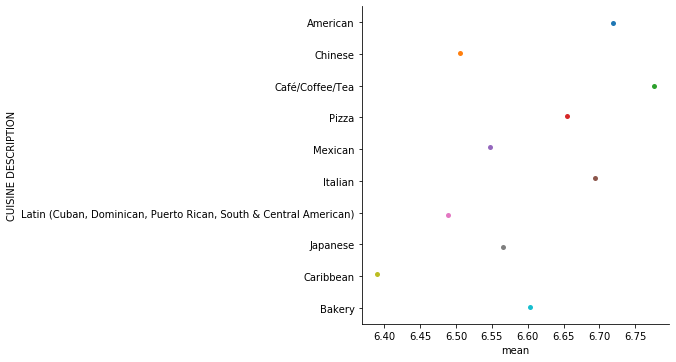

In [102]:
sns.catplot(x='mean',y='CUISINE DESCRIPTION',data=top_cuisine_with_grade)

In [103]:
bottom_cuisine_with_grade=bottom_cuisine_with_grade.reset_index()

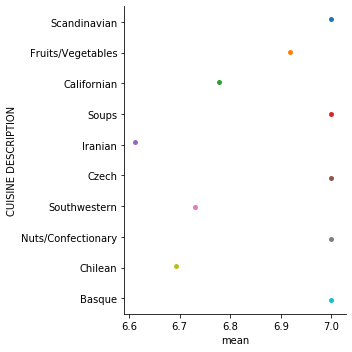

In [104]:
sns.catplot(x='mean',y='CUISINE DESCRIPTION',data=bottom_cuisine_with_grade)

### Type popularities do not affect their grading. Some lowest popular types of the restaurant (at the bottom of the popularity list) are graded high, such as “Soups”, “Czech”, and “Basque”, when comparing the mean for each cuisine. At same time, the highest popular cuisine does not mean always graded well. We cannot predict rating based on the popularities of the restaurant.

##  2. Can we predict popularity based on the type of the restaurant?

In [105]:
total=a.assign(Brooklyn=b['count'],Queens=c['count'],Bronx=d['count'],StatenIsland=e['count'])
total=total.head(10).reset_index()

total["CUISINE DESCRIPTION"]= total["CUISINE DESCRIPTION"].replace( 'Latin (Cuban, Dominican, Puerto Rican, South & Central American)', "Latin")

total

,CUISINE DESCRIPTION,Manhattan,Brooklyn,Queens,Bronx,StatenIsland
0,American,43039,18277.0,13218.0,5549.0,3087.0
1,Chinese,10778,12627.0,13147.0,4269.0,1181.0
2,Café/Coffee/Tea,10186,5334.0,2660.0,742.0,270.0
3,Italian,9525,2633.0,1743.0,857.0,1183.0
4,Japanese,7799,3035.0,2500.0,300.0,560.0
5,Pizza,5507,4395.0,3948.0,2809.0,790.0
6,Mexican,5296,4909.0,3167.0,2164.0,725.0
7,Latin,4098,2952.0,6480.0,3549.0,173.0
8,Bakery,3703,3368.0,3659.0,1199.0,428.0
9,French,3616,727.0,198.0,13.0,NaN


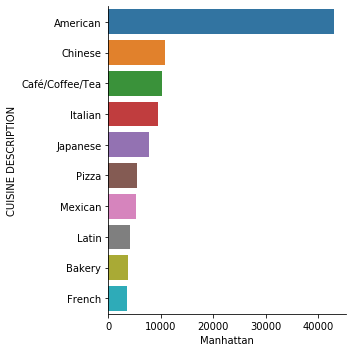

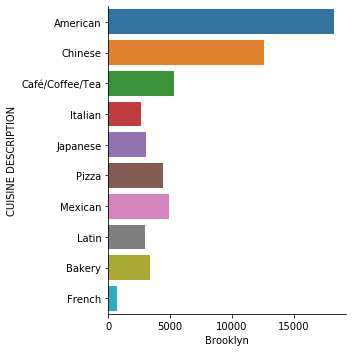

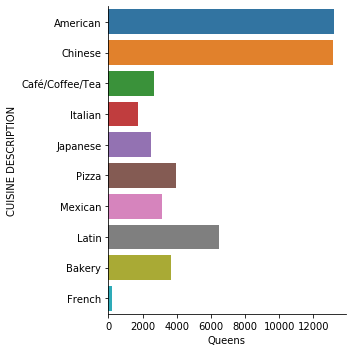

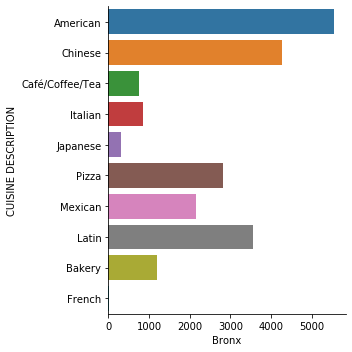

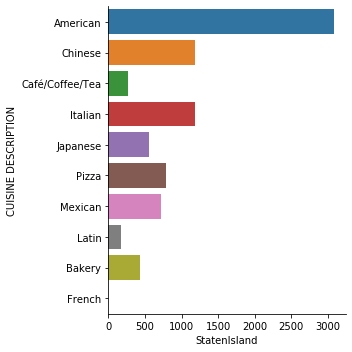

In [106]:
total1=total.reset_index()
graph_m=sns.catplot(x='Manhattan', y='CUISINE DESCRIPTION',kind='bar',data=total1)
graph_m
graph_b=sns.catplot(x='Brooklyn', y='CUISINE DESCRIPTION',kind='bar',data=total1)
graph_b
graph_q=sns.catplot(x='Queens', y='CUISINE DESCRIPTION',kind='bar',data=total1)
graph_q
graph_bb=sns.catplot(x='Bronx', y='CUISINE DESCRIPTION',kind='bar',data=total1)
graph_bb
graph_s=sns.catplot(x='StatenIsland', y='CUISINE DESCRIPTION',kind='bar',data=total1)
graph_s

In [107]:
total_per=total
total_per.set_index('CUISINE DESCRIPTION', inplace=True)
total_per.loc['Total',:]= total_per.sum(axis=0)
total_per

,Manhattan,Brooklyn,Queens,Bronx,StatenIsland
CUISINE DESCRIPTION,,,,,
American,43039.0,18277.0,13218.0,5549.0,3087.0
Chinese,10778.0,12627.0,13147.0,4269.0,1181.0
Café/Coffee/Tea,10186.0,5334.0,2660.0,742.0,270.0
Italian,9525.0,2633.0,1743.0,857.0,1183.0
Japanese,7799.0,3035.0,2500.0,300.0,560.0
Pizza,5507.0,4395.0,3948.0,2809.0,790.0
Mexican,5296.0,4909.0,3167.0,2164.0,725.0
Latin,4098.0,2952.0,6480.0,3549.0,173.0
Bakery,3703.0,3368.0,3659.0,1199.0,428.0


In [108]:
total_per.Manhattan = total_per.Manhattan*100/103547

In [109]:
total_per.Brooklyn = total_per.Brooklyn*100/58257

In [110]:
total_per.Queens = total_per.Queens*100/50720

In [111]:
total_per.Bronx = total_per.Bronx*100/21451

In [112]:
total_per.StatenIsland = total_per.StatenIsland*100/8397
total_per.round(2)

,Manhattan,Brooklyn,Queens,Bronx,StatenIsland
CUISINE DESCRIPTION,,,,,
American,41.56,31.37,26.06,25.87,36.76
Chinese,10.41,21.67,25.92,19.90,14.06
Café/Coffee/Tea,9.84,9.16,5.24,3.46,3.22
Italian,9.20,4.52,3.44,4.00,14.09
Japanese,7.53,5.21,4.93,1.40,6.67
Pizza,5.32,7.54,7.78,13.09,9.41
Mexican,5.11,8.43,6.24,10.09,8.63
Latin,3.96,5.07,12.78,16.54,2.06
Bakery,3.58,5.78,7.21,5.59,5.10


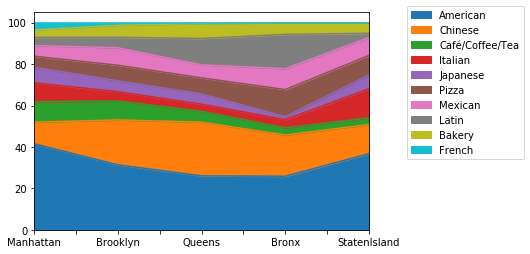

In [113]:
total_plot=total_per[:-1]
df = pd.DataFrame(total_plot)
df=df.astype(float)
df_plot=df.T.plot.area()
df_plot.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

### Most type of the restaurant affects its popularity. Five boroughs (The Bronx, Brooklyn, Manhattan, Queens, and Staten Island) in New York City have similar results for popularity of restaurant’s types. All boroughs had American cuisine as the most popular type of restaurant. Their popularity ranks are not exactly same, but most of them are related to restaurants’ cuisines.

## 3. Can we predict rating based on the location of the restaurant?


In [114]:
grade_sub.groupby('CUISINE DESCRIPTION')['GRADE'].agg(['mean','count','std']).sort_values('mean',ascending=False).head(5)

,mean,count,std
CUISINE DESCRIPTION,,,
Czech,7.0,28,0.0
Basque,7.0,4,0.0
Nuts/Confectionary,7.0,24,0.0
Scandinavian,7.0,41,0.0
Soups,7.0,32,0.0


In [115]:
a1=grade_sub.groupby('BORO')['GRADE'].agg(['count']).sort_values('count',ascending=False).reset_index()
a1['count']=(a1['count'])/a1['count'].sum()

In [116]:
a2=grade_sub.groupby('GRADE')['GRADE'].agg(['count']).sort_values('count',ascending=False).reset_index()
a2['count']=(a2['count'])/a2['count'].sum()

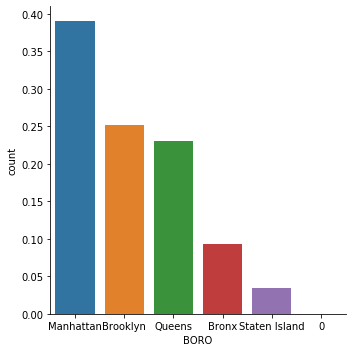

In [117]:
sns.catplot(x='BORO',y='count',kind='bar', data=a1)

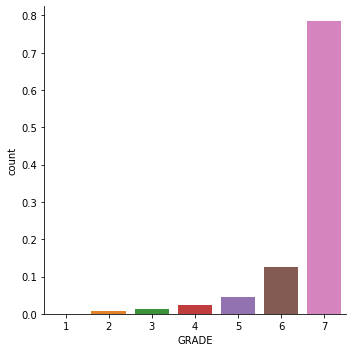

In [118]:
sns.catplot(x='GRADE',y='count',kind='bar', data=a2)

In [119]:
grade_sub.groupby('BORO')['GRADE'].agg(['mean','count','std']).sort_values('mean',ascending=False)

,mean,count,std
BORO,,,
Staten Island,6.683814,6765,0.796269
Manhattan,6.635894,78219,0.862866
Queens,6.614701,46229,0.913507
Brooklyn,6.610028,50437,0.904697
Bronx,6.585610,18596,0.880145
0,6.562500,48,0.711793


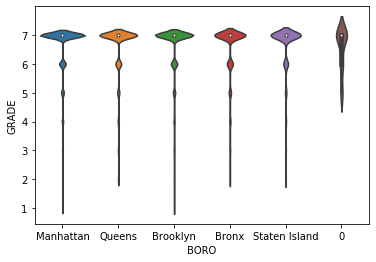

In [120]:
sns.violinplot(y='GRADE', x='BORO', data=grade_sub)

### Location of the restaurant does not have a mutual relationship with restaurants’ rating. When comparing means of each borough’s grade, all boroughs have very close numbers. Brooklyn has the highest grade in New York City while Manhattan has the largest number of restaurants. Based on the location, we only can predict the number of the restaurants, not rating.​

## 4. Does borough and type of violation has a relationship?


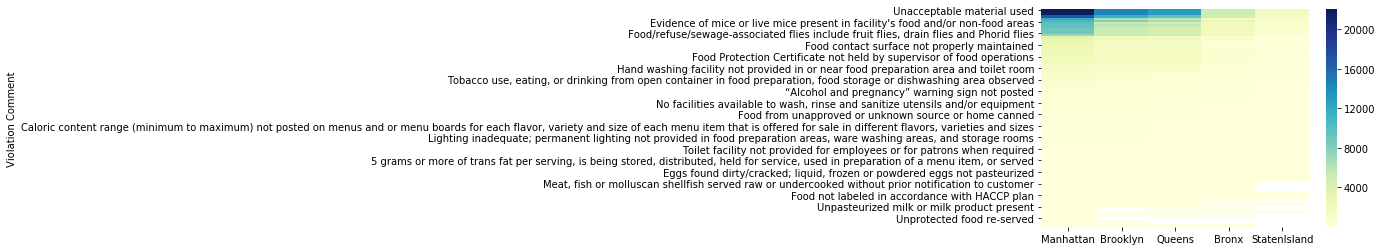

In [121]:
ax = sns.heatmap(violation_total, cmap="YlGnBu")

### Based on the analysis we performed, no relationship between borough and type of violation were detected. The most popular violation type for all boroughs is 'Unacceptable materials used'. Even though there is some variety from borough to borough in types of violation, there is the common group of popular violations for all restaurants. 

# Additional Question

## Is there relationship between grade of the inspection and average income per borough?


In [122]:
income = pd.read_csv("https://www.census.gov/quickfacts/fact/csv/newyorkcountymanhattanboroughnewyork,bronxcountybronxboroughnewyork,queenscountyqueensboroughnewyork,kingscountybrooklynboroughnewyork,richmondcountystatenislandboroughnewyork,newyorkcitynewyork/PST120218")

In [123]:
income_t = income.set_index(['Fact']).transpose()

In [124]:
income_t = income_t['Median household income (in 2017 dollars), 2013-2017'].to_frame()
income_t['BORO'] = income_t.index
income_t.reset_index(drop=True)

,"Median household income (in 2017 dollars), 2013-2017",BORO
0,NaN,Fact Note
1,"$79,781","New York County (Manhattan Borough), New York"
2,NaN,Value Note for New York County (Manhattan Boro...
3,"$36,593","Bronx County (Bronx Borough), New York"
4,NaN,"Value Note for Bronx County (Bronx Borough), N..."
5,"$62,008","Queens County (Queens Borough), New York"
6,NaN,"Value Note for Queens County (Queens Borough),..."
7,"$52,782","Kings County (Brooklyn Borough), New York"
8,NaN,Value Note for Kings County (Brooklyn Borough)...
9,"$76,244","Richmond County (Staten Island Borough), New York"


In [125]:
income_t = income_t.dropna()
income_boro = {}
for j in grade_sub['BORO'].unique():
    for i, k in income_t.iterrows():
        if j in k['BORO']:
            income_boro[j]=int(k['Median household income (in 2017 dollars), 2013-2017'][1:].replace(",", ""))

In [126]:
income_boro

{'Manhattan': 79781,
 'Queens': 62008,
 'Brooklyn': 52782,
 'Bronx': 36593,
 'Staten Island': 76244}

In [127]:
income_boro_df = pd.DataFrame({"INCOME":income_boro})
income_boro_df['BORO'] = income_boro_df.index
new_df = pd.merge(grade_sub, income_boro_df, on="BORO")

In [128]:
top_cuisine_with_score = grade_sub.groupby('BORO')['GRADE'].agg(['mean','count','std']).sort_values('mean',ascending=False)
top_cuisine_with_score.reset_index(level=0, inplace=True)
top_cuisine_with_score['BORO'][5] = "N/A"


In [129]:
top_cuisine_with_score_w_income = pd.merge(top_cuisine_with_score, income_boro_df, on="BORO")

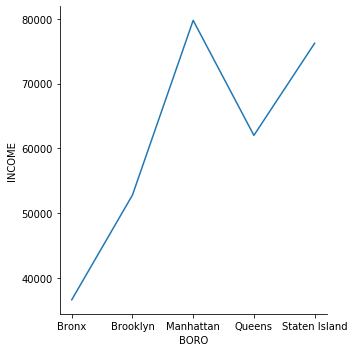

In [130]:
sns.relplot(x='BORO', y='INCOME', kind='line', data=top_cuisine_with_score_w_income)

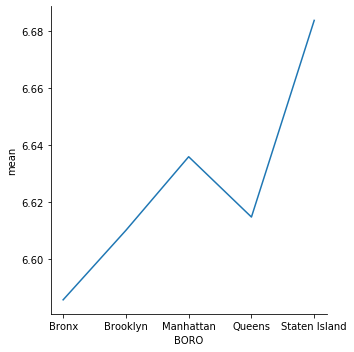

In [131]:
sns.relplot(x='BORO', y='mean', kind='line',data=top_cuisine_with_score_w_income)


### There is no clear relationship between grade of the inspection and average income per borough. Bronx and Staten Island have negative raletionship while Manhattan has positive relashionship between its average grade of inspectatin and average income. 